In [10]:
import pandas as pd
import psycopg2
import os
import matplotlib.pyplot as plt
import seaborn as sns

# PostgreSQL Database connexion
conn = psycopg2.connect(
    dbname='dataafriquehub',
    user=os.environ.get('ANDERSONBDUSER'),
    password=os.environ.get('ANDERSONBDPASS'),
    host='127.0.0.1',
    port=5432
)

Defaulting to user installation because normal site-packages is not writeable


In [14]:
# Load data into Dataframe
df = pd.read_sql_query("SELECT * FROM dataafriquehub_moviecomment ", conn)
# print data
df

/home/anderson/.local/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,id,user_name,film_id,content,created_at,updated_at,review,user_id
0,1,string,147,string,2024-08-14 16:17:04.927515+00:00,2024-08-14 16:17:04.927572+00:00,False,1
1,2,string,147,i very very like it,2024-08-14 16:17:41.027187+00:00,2024-08-14 16:17:41.027206+00:00,True,1
2,3,rr,240,rr,2024-08-14 16:26:39.035007+00:00,2024-08-14 16:26:39.035047+00:00,False,1
3,4,John,129,This movies is very bad. i really don't like it,2024-08-16 09:41:53.915195+00:00,2024-08-16 09:41:53.915223+00:00,False,1
4,5,Alice,278,This movie was fantastic! I loved every moment...,2024-08-16 11:01:09.482737+00:00,2024-08-16 11:01:09.482776+00:00,True,42
...,...,...,...,...,...,...,...,...
102,103,Ruby,346,Well worth the watch! Great fun.,2024-08-16 11:01:22.698015+00:00,2024-08-16 11:01:22.698038+00:00,True,91
103,104,Maria,19404,Just okay; I expected a lot more.,2024-08-16 11:01:22.820210+00:00,2024-08-16 11:01:22.820230+00:00,False,7
104,105,Blake,238,The characters were relatable and well crafted.,2024-08-16 11:01:22.947666+00:00,2024-08-16 11:01:22.947690+00:00,True,43
105,106,Holly,680,Very dull; I almost turned it off.,2024-08-16 11:01:23.073156+00:00,2024-08-16 11:01:23.073176+00:00,False,75


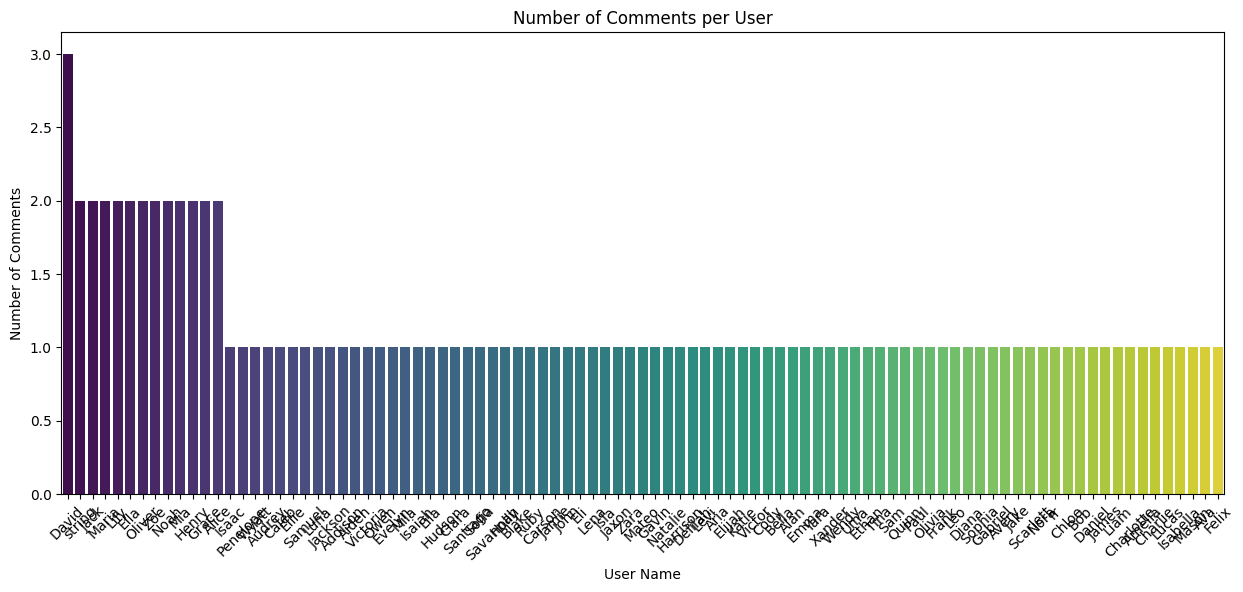

In [26]:
# Counting comments per user
user_counts = df['user_name'].value_counts()
# Plotting the counts of comments per user
plt.figure(figsize=(15, 6))
sns.barplot(x=user_counts.index, y=user_counts.values, palette="viridis")
plt.title('Number of Comments per User')
plt.xlabel('User Name')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

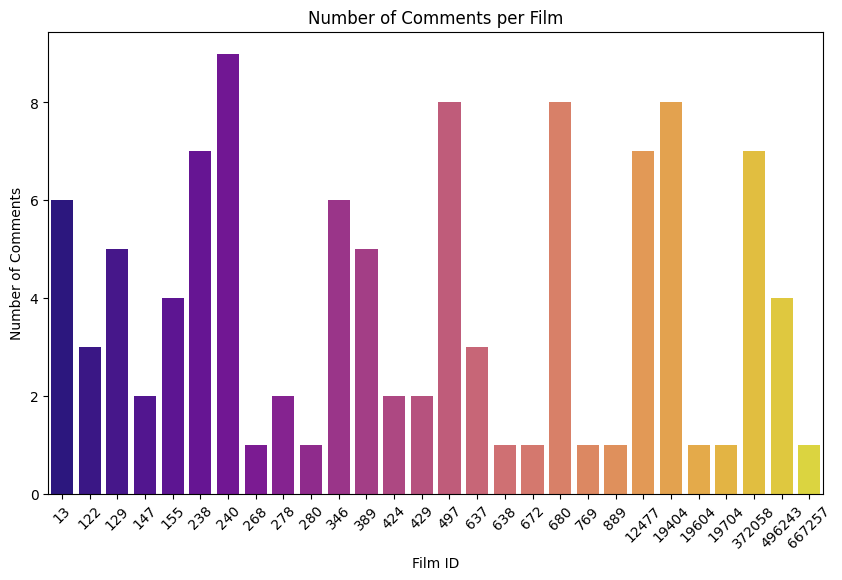

In [21]:
# Counting comments per film
film_counts = df['film_id'].value_counts()

# Plotting the counts of comments per film
plt.figure(figsize=(10, 6))
sns.barplot(x=film_counts.index, y=film_counts.values, palette="plasma")
plt.title('Number of Comments per Film')
plt.xlabel('Film ID')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

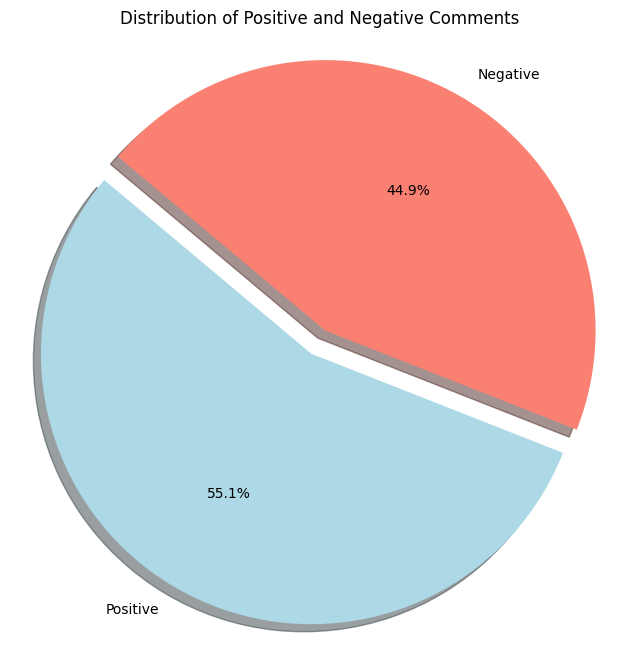

In [29]:
# Calculate the number of positive and negative comments
positive_comments = df[df['review'] == True]
negative_comments = df[df['review'] == False]

# Count the comments
num_positive = positive_comments.shape[0]
num_negative = negative_comments.shape[0]

# Create a pie chart for positive vs negative comments
labels = ['Positive', 'Negative']
sizes = [num_positive, num_negative]
colors = ['lightblue', 'salmon']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribution of Positive and Negative Comments')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()


In [30]:
# Fermer la connexion à la base de données
conn.close()